<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

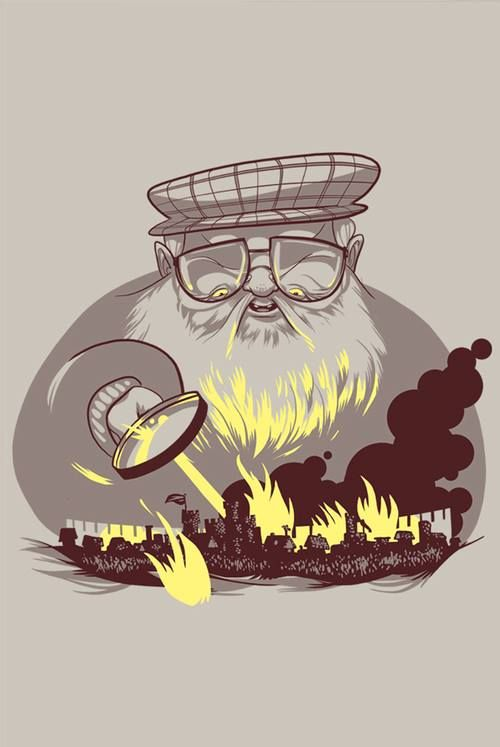

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 67.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 102MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
print(data.head())

                      name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   NaN     1       NaN          NaN   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1       NaN          NaN   
4              Aemma Arryn                 Queen     0       NaN         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   

                  mother            father                heir  \
S.No                                                             
1     Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
2                    NaN               NaN                 NaN   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   
5                    NaN            

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
nan_values = data.isnull().sum()
print(nan_values)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


In [ ]:
for col in data.columns:
    if data[col].isnull().any():
        mode_val = data[col].mode().iloc[0]
        data[col].fillna(mode_val, inplace=True)
#data = data.dropna()
#data = data.fillna(data.median())
#data = data.fillna(data.mode().iloc[0])
print(data.head())

                      name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   Ser     1  Northmen        286.0   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1  Northmen        286.0   
4              Aemma Arryn                 Queen     0  Northmen         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   

                  mother             father                 heir  \
S.No                                                               
1     Rhaenyra Targaryen   Daemon Targaryen   Aegon IV Targaryen   
2       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
3       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
4       Cersei Lannister  Aegon I Targaryen  Jaehaerys Targaryen   
5       Cersei Lannister

<ipython-input-229-a3127452f3a9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data['isPopular'] = (data['popularity'] >= 0.5).astype(int)

data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,286.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Frey,Walder Frey,...,0.0,1.0,0,0,100.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Perra Royce,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,286.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Swyft,Walder Frey,...,1.0,1.0,0,1,100.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Arryn,Viserys I Targaryen,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Santagar,Eldon Estermont,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

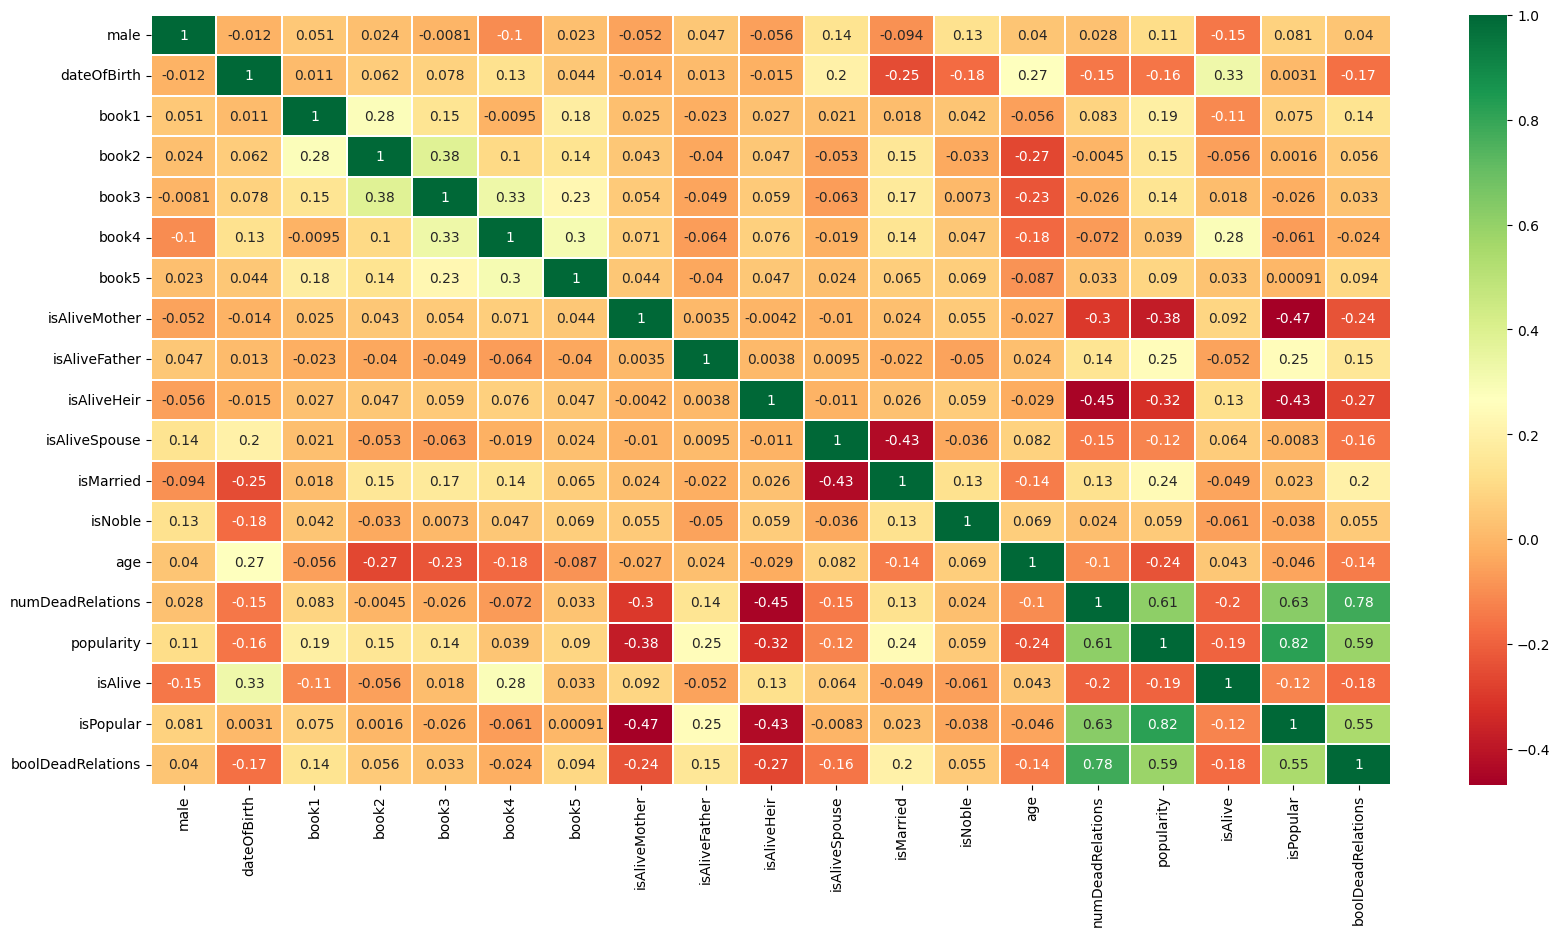

In [ ]:

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical columns
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

In [ ]:
data.drop(columns=["name", "male", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "isMarried", "isNoble", "numDeadRelations", "popularity", "isPopular",
"boolDeadRelations"], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
print(data['isAlive'].dtype)
print(data['isAlive'].value_counts())

int64
isAlive
1    1212
0     345
Name: count, dtype: int64


In [ ]:
print("Class distribution:")
print("Alive:", len(data[data['isAlive'] == 1]), f"({len(data[data['isAlive'] == 1]) / len(data) * 100:.2f}%)")
print("Dead:", len(data[data['isAlive'] == 0]), f"({len(data[data['isAlive'] == 0]) / len(data) * 100:.2f}%)")

Class distribution:
Alive: 1212 (77.84%)
Dead: 345 (22.16%)


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
data = pd.get_dummies(data, columns=categorical_cols)
print(categorical_cols)

Index(['title', 'culture', 'mother', 'father', 'heir', 'house'], dtype='object')


In [ ]:
#Index(['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse'], dtype='object')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# Корреляционный анализ
corr_matrix = data.corr()
print(corr_matrix)

# Анализ взаимосвязей между признаками и целевой переменной
for col in data.columns:
    if col != 'isAlive':
        print(f'Корреляция между {col} и isAlive: {data[col].corr(data["isAlive"])}')

                      dateOfBirth     book1     book2     book3     book4  \
dateOfBirth              1.000000  0.010822  0.062144  0.077713  0.133304   
book1                    0.010822  1.000000  0.278116  0.145458 -0.009461   
book2                    0.062144  0.278116  1.000000  0.380968  0.102247   
book3                    0.077713  0.145458  0.380968  1.000000  0.329153   
book4                    0.133304 -0.009461  0.102247  0.329153  1.000000   
...                           ...       ...       ...       ...       ...   
house_Summer Islands     0.005842  0.063166  0.036323  0.029093  0.022352   
house_The Citadel        0.005842 -0.010174 -0.017693 -0.022091 -0.028752   
house_Windblown          0.005842 -0.010174 -0.017693 -0.022091 -0.028752   
house_Wise Masters       0.005842 -0.010174 -0.017693  0.029093  0.022352   
house_wildling           0.004994 -0.010174 -0.017693  0.029093 -0.028752   

                         book5       age   isAlive  title_Acorn Hall  \
dat

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_logistic_regression = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. Создание модели
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Шаг 2. Обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada_boost = ada_boost.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Шаг 2. Обучение модели
random_forest.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_random_forest = random_forest.predict(X_test)

In [ ]:
gaussian_process = GaussianProcessClassifier(random_state=42)

# Шаг 2. Обучение модели
gaussian_process.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gaussian_process = gaussian_process.predict(X_test)

In [ ]:
# Шаг 1. Создание модели
gaussian_nb = GaussianNB()

# Шаг 2. Обучение модели
gaussian_nb.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

In [ ]:
# Шаг 1. Создание модели
k_neighbors = KNeighborsClassifier(n_neighbors=5)

# Шаг 2. Обучение модели
k_neighbors.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_k_neighbors = k_neighbors.predict(X_test)

In [ ]:
# Шаг 1. Создание модели
svc = SVC(kernel='linear', C=1)

# Шаг 2. Обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

In [ ]:
# Шаг 1. Создание модели
decision_tree = DecisionTreeClassifier(random_state=42)

# Шаг 2. Обучение модели
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_decision_tree = decision_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_logistic_regression = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Accuracy LogisticRegression : %.2f" % accuracy_logistic_regression)

Accuracy LogisticRegression : 0.78


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada_boost = ada_boost.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada_boost = accuracy_score(y_test, y_pred_ada_boost)
print("Accuracy AdaBoostClassifier : %.2f" % accuracy_ada_boost)

Accuracy AdaBoostClassifier : 0.79


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_random_forest = random_forest.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy RandomForestClassifier : %.2f" % accuracy_random_forest)

Accuracy RandomForestClassifier : 0.80


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gaussian_process = gaussian_process.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gaussian_process = accuracy_score(y_test, y_pred_gaussian_process)
print("Accuracy GaussianProcessClassifier : %.2f" % accuracy_gaussian_process)

Accuracy GaussianProcessClassifier : 0.82


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_gaussian_nb = gaussian_nb.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
print("Accuracy GaussianNB : %.2f" % accuracy_gaussian_nb)

Accuracy GaussianNB : 0.42


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_k_neighbors = k_neighbors.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_k_neighbors = accuracy_score(y_test, y_pred_k_neighbors)
print("Accuracy KNeighborsClassifier : %.2f" % accuracy_k_neighbors)

Accuracy KNeighborsClassifier : 0.84


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_svc = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy SVC : %.2f" % accuracy_svc)

Accuracy SVC : 0.79


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_decision_tree = decision_tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy DecisionTreeClassifier : %.2f" % accuracy_decision_tree)

Accuracy DecisionTreeClassifier : 0.79


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.11MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [ ]:
#submission = pd.DataFrame({'S.No': range(1, len(X_test) + 1)})

# Add predicted values from each model
submission['Logistic Regression'] = round(accuracy_logistic_regression, 2)
submission['Ada Boost'] = round(accuracy_ada_boost, 2)
submission['Random Forest'] = round(accuracy_random_forest, 2)
submission['Gaussian Process'] = round(accuracy_gaussian_process, 2)
submission['Gaussian NB'] = round(accuracy_gaussian_nb, 2)
submission['K-Neighbors'] = round(accuracy_k_neighbors, 2)
submission['SVC'] = round(accuracy_svc, 2)
submission['Decision Tree'] = round(accuracy_decision_tree, 2)

# Save the modified submission file
submission.to_csv("/content/new_submission.csv", index=False)


In [ ]:
submission

,isAlive,Logistic Regression,Ada Boost,Random Forest,Gaussian Process,Gaussian NB,K-Neighbors,SVC,Decision Tree
S.No,,,,,,,,,
1558,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1559,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1560,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1561,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1562,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
...,...,...,...,...,...,...,...,...,...
1942,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1943,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1944,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

In [ ]:
submission

,isAlive,Logistic Regression,Ada Boost,Random Forest,Gaussian Process,Gaussian NB,K-Neighbors,SVC,Decision Tree
S.No,,,,,,,,,
1558,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1559,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1560,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1561,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1562,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
...,...,...,...,...,...,...,...,...,...
1942,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1943,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
1944,0,0.78,0.79,0.8,0.82,0.42,0.84,0.79,0.79
